This script uses the Gradient Descent algorithm, built from scratch, to find the coefficient that minimizes the sum of errors in a regression task.

Cost function: $J(\theta) = \frac{1}{2m}\sum \limits _{i = 1} ^ {m} (h_{\theta}(x_{i}) - y_{i})^{2}$

Objective: $ \underset {\theta1} {\textrm{min}}J(\theta)$

Algorithm: $\theta_{j} := \theta_{j} - \alpha \frac {\partial J(\theta)} {\partial \theta_{j}}$

$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\theta_{j} := \theta_{j} - \frac{\alpha}{m} (h_{\theta}(x_{i}) - y_{i})^{2}$


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

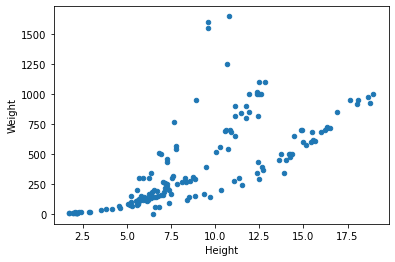

In [39]:
# DATASET
df = pd.read_csv("Fish.csv")
df_sub = df[["Height", "Weight"]] # We want to predict the weight of the fish based on its height.
df_sub.plot.scatter("Height", "Weight")

plt.show()


Even though it is a non-linear relationship, the data is used only as an example to fit a regression line with the Gradient Descent algorithm.

In [17]:
# ALGORITHM
def sgd_scratch(x, y, alpha, epochs):
    """ THIS FUNCTION RETURNS A LIST OF THETAS GENERATED BY THE GRADIENT DESCENT (GD) ALGORITHM, THE LAST """
    """ BEING THE ONE THAT MINIMIZES THE SUM OF SQUARED ERRORS GIVEN THE LEARNING RATE ALPHA AND THE NUMBER OF EPOCHS """
    theta_1 = np.random.random() # initializes random variable
    thetas = [theta_1] # I will store the coefficients to see if they converge later on
    for i in range(1,epochs):
        theta_1 = theta_1 - (alpha/len(x))*sum((x*theta_1 - y) * x) # here the coefficient will be updated based on the GD algorithm
        thetas.append(theta_1)
    return thetas

In [22]:
# ESTIMATED VALUES FROM LIST OF THETAS
def curves(x, thetas_list):
    """ THIS FUNCION RETURNS A DATAFRAME WITH THE PREDICTIONS MADE BY EACH COEFFICIENT FOUND """
    l = []
    for theta in thetas_list:
        y_pred = x.values*theta
        l.append(y_pred)

    df_preds = pd.DataFrame(l).T
    return df_preds


In [23]:
thetas = sgd_scratch(df_sub.Height, df_sub.Weight, 0.001, 100)
df_estimates = curves(df_sub.Height, thetas)

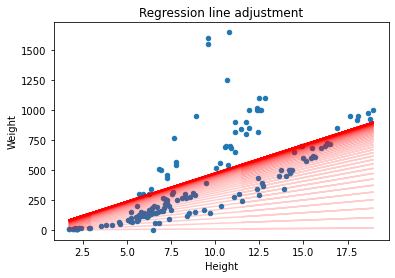

In [28]:
# FITTED VALUES

df_sub.plot.scatter("Height", "Weight")

for col in df_y.columns:
    plt.plot(df_sub.Height, df_y[col], color = "r", alpha = 0.2)

plt.title("Regression line adjustment")

plt.show()

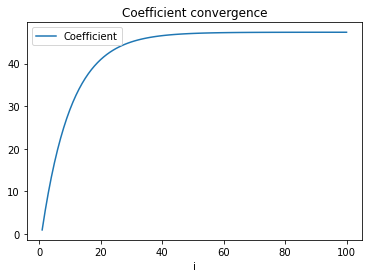

In [33]:
# CHECKS THE CONVERGENCE OF THE COEFFICIENT

coefs_df = pd.DataFrame(thetas, columns = ["Coefficient"])
coefs_df["i"] = range(1, len(coefs_df)+1)

coefs_df.plot("i", "Coefficient")

plt.title("Coefficient convergence")

plt.show()